$$
\def\I{{\rm i}}
\def\qq{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>

Lab demonstrators: Luke Traynor, Xiaoquan Yu
<br>
Website: Blackboard
<br>
Class reps: Chris Hayton, Felix Cook

# Dynamical Systems
## Outline
- Predator-Prey model (Lotka-Volterra system)
- Steady states (fixed points)
- Linearisation, and its failure
- Numerical integration of ODE's
- Interacting with your resuts   

# Predator-Prey Model

<div style="width: 200px;">![Rabbit_in_montana.jpg](attachment:Rabbit_in_montana.jpg)</div>

<div style="width: 200px;">![220px-Black_and_White_Wolves.jpg](attachment:220px-Black_and_White_Wolves.jpg)</div>

A classical problem in population dynamics is the so-called predator-prey system described by the famous [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka–Volterra_equations). 

Aswell as being interesting in its own right, this system forms a wonderful testing ground for us to learn some very general techniques of numerical solution and analysis. 

## Physical System
### Rabbits
Consider a population of rabbits, $r(t)$, evolving in time due to forces in its environment. 

There are two important effects:

1. The reproductive growth rate $\lambda$.
2. The natural decay rate $\gamma$ due to predation by wolves. 

It is assumed that the rabbits don't live long enough to die of old age, but have population decay rate determined by the number of wolves. 
### Wolves
The wolves on the other hand, being apex predators, are assumed to die of old age, and to have reproductive growth rate depending on the abundance of their food supply, the rabbits.

The population $w(t)$ is thus altered by two main affects: 

1. Reproductive growth rate $\kappa$
2. Natural decay rate due to old age $\beta$.

## Equations of motion
The **Lotka-Volterra equations** for this system take the form:
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{dr}{dt}&=\lambda r - \gamma wr\\
\frac{dw}{dt}&=-\beta w + \kappa rw\tag{1}
\end{align}
</font>
</div>
The solutions of this two-variable system of coupled **nonlinear** equations tells us everything about our simple model for population dynamics.  

## Analysis
Of course, we can go ahead numerically integrate the equations and examine the solutions. 

To do that successfully we also need to understand the physical meaning of different initial conditions.

Before we do that, we should ask:

1. Are there any regimes that we can describe analytically?
2. Are there any obvious sanity checks for our results?

The first question to answer is: what are the restrictions on the coeffecients in order that our equations describe the rabbit-wolf system? 

A brief inspection should reveal that we require $\beta, \gamma, \kappa, \lambda$ all real and positive for the equations of motion to correspond with our conceptual formulation of the model. 
- What goes wrong with the model if $\gamma <0$?

The second question for any system of time-evolution equations is the role of initial conditions. What is a meaningful initial condition for our system? 
### Stationary solutions (fixed-points)
A very useful approach is to look for stationary solutions of the equations of motion. 

That is, we seek *time-independent* solutions $w(t)\equiv\bar w$, $r(t)\equiv\bar r$ of the equations of motion. 

Assuming such solutions exist, when the populations reach these special values, all of the growth and decay processes altering the rabbit and wolf populations are in perfect balance. 

Such fixed-point solutions are non-trivial as our equations of motion are nonlinear.

By *definition*, the fixed-point populations $\bar r, \bar w$ are solutions of the time-independent equations under the condition that $dr/dt=dw/dt\equiv 0$, in other words, we should solve the simpler system:
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
0&=\lambda \bar r - \gamma \bar w\bar r\\
0&=-\beta \bar w + \kappa \bar r\bar w\tag{2}
\end{align}
</font>
</div>

with solutions
\begin{align}
\bar r&=\frac{\beta}{\kappa} \\
\bar w&=\frac{\lambda}{\gamma}\tag{3}
\end{align}

The fixed-point solutions will play a central role in undertanding all of the complicated time dynamics that can occur in the rabbit-wolf system. 

We can interpret these populations as occuring due to a competition between the primary forces acting on each population
- Why does the decay rate of rabbits, $\kappa$, not appear in the steady-state solution for $w(t)$?

# Numerical solution
Let's solve the equations of motion. We could write our own integrators to do this, but at this point we are going to use this opportunity to get familiar with some existing Julia packages, and the process of using Julia.

In [ ]:
#requires (only required the first time you install any of these packages)
#ENV["PYTHON"]=""; # make sure we use containerised miniconda
#Pkg.add("PyPlot") # Matlab-esque plotting
#Pkg.add("Interact") # interact with your results
#Pkg.add("DifferentialEquations") # a LARGE meta-package. Will take a while to install and compile the first time

In [1]:
using DifferentialEquations, PyPlot

In [2]:
#system parameters
λ = .7   # rabbit growth
γ = 0.4  # rabbit loss
κ = 0.3  # wolf growth
β = 1.2  # wolf loss

#define the equations of motion
function lotkavolterra(du,u,p,t)
    du[1] =  λ*u[1] - γ*u[2]*u[1]
    du[2] = -β*u[2] + κ*u[1]*u[2]
end

#Sanity check: let us verify that if we start at a fixed point, it is really a stationary solution
r̄ = β/κ
w̄ = λ/γ
u0 = [r̄ ; w̄]
ti = 0.0
tf = .2
Nt = 100
tspan = (ti,tf)
t = collect(linspace(ti,tf,Nt))

#define the problem type
prob = ODEProblem(lotkavolterra,u0,tspan)

#solve the problem, saving at specified time points
@time sol = solve(prob,saveat=t);

  4.095775 seconds (5.78 M allocations: 740.971 MiB, 2.49% gc time)


In [3]:
#solve the problem, saving at specified time points
@time sol = solve(prob,saveat=t);

  0.000223 seconds (2.03 k allocations: 72.563 KiB)


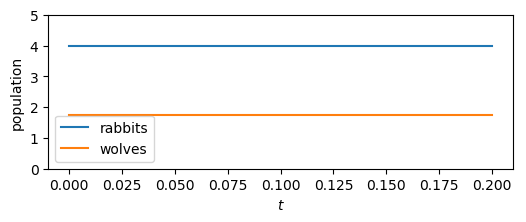

r̄ = 4.0
w̄ = 1.7499999999999998


In [4]:
r = sol[1,:]; w = sol[2,:]
#plot the solution
figure(figsize=(6,2))
plot(t,r);plot(t,w)
xlabel(L"t");ylabel("population");legend(["rabbits","wolves"])
ylim([0., 5.]);
println("r̄ = ",r̄); println("w̄ = ",w̄);

## Steady-state: small perturbations

In [5]:
#parameters
λ = .7  # rabbit growth
γ = 0.4  # rabbit loss
κ = 0.3  # wolf growth
β = 1.2  # wolf loss

#what happens if the rabbits and wolves start near, but not exactly at, a fixed point?
ϵ = .1
u0 = [β/κ + ϵ ; λ/γ - ϵ] #one slightly larger, one slightly smaller
ti = 0.0
tf = 50.0
Nt = 200
tspan = (ti,tf)
t = collect(linspace(ti,tf,Nt))

prob = ODEProblem(lotkavolterra,u0,tspan)
@time sol = solve(prob,saveat=t);

#pull the time evolution out of the ODE solver
r = sol[1,:]; w = sol[2,:];

  0.000589 seconds (4.61 k allocations: 141.188 KiB)


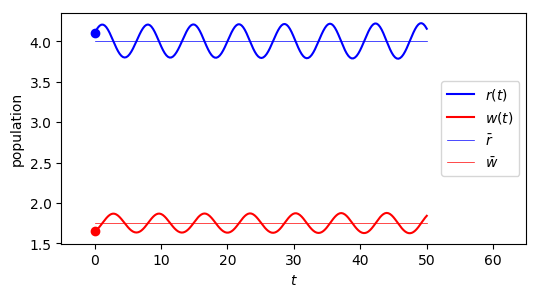

In [6]:
figure(figsize=(6,3))
plot(t,r,color="blue")
plot(t,w,color="red")
plot(t,r̄*ones(t),color="blue",lw=.5)
plot(t,w̄*ones(t),color="red",lw=.5)
plot(0.0,u0[1],"o",color="blue")
plot(0.0,u0[2],"o",color="red")
xlabel(L"t");ylabel("population")
xlim(-5,65)
legend([L"r(t)",L"w(t)",L"\bar r",L"\bar w"],loc="right");

# Analytic solution: linearisation
We can expand upon this notion of steady states further and linearise the Lotka-Volterra system around the steady-steady state. 

If we are on the right track, we should expect to find out the properties of small excursions from the steady state. 

The procedure is very general, and this kind of analysis can reveal fundamental properties of equations of motion. 

The essential assumption is that we consider **small departures** from the steady state. It is then perfectly legitimate to linearise the equations of motion, by which we mean simply that we should only retain terms that are at most linear in the amplitude of the departure. 

In mathematical terms, we can write a general solution in the form 

\begin{align}
r(t)&=\bar r+\epsilon(t)\\
w(t)&=\bar w+\delta(t)\tag{4}
\end{align}

where our barred variables describe the steady state solution, and hence are *by definition* **independent of time**. Recall that the steady state solutions satisfy the fixed point equations. The **linearisation** appears when we insist that $\epsilon, \delta$ must be small, and we then make use of this property to neglect **nonlinear** terms, namely any terms of order $\epsilon^2, \delta^2, \epsilon\delta$, or indeed any higher powers. 

Now that we have written the solution in suitable form, we substitute into the equations of motion to give
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{d\epsilon}{dt}&=\lambda (\bar r+\epsilon) - \gamma (\bar w+\delta)(\bar r+\epsilon)\\
\frac{d\delta}{dt}&=-\beta (\bar w+\delta) + \kappa (\bar w+\delta)(\bar r+\epsilon)
\end{align}
</font>
</div>

Linearising, and using the fixed point equations (2), (3), we find
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{d\epsilon}{dt}&=- \gamma \bar r\delta\\
\frac{d\delta}{dt}&= \kappa \bar w\epsilon\tag{5}
\end{align}
</font>
</div>
There is a lot of fortuitous cancellation! 

These simple coupled equations can now be solved using a standard trick. 

We notice that the $\dot\epsilon$ equation only couples to $\delta$, and $\dot\delta$ only couples ot $\epsilon$. 

If we differentiate again with respect to time, we find that the equations decouple nicely:
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{d^2\epsilon}{dt^2}&=- \gamma \kappa\bar r\bar w\epsilon=-\omega^2\epsilon,\\
\frac{d^2\delta}{dt^2}&= -\gamma \kappa\bar r\bar w\epsilon=-\omega^2\delta\tag{6}
\end{align}
</font>
</div>
and both equations describe simple harmonic (oscillatory) motion; we have identified a characteristic frequency of oscillation 

$$\omega\equiv\sqrt{\gamma \kappa\bar r\bar w}.$$

Notice that linearisation has revealed quite a lot about the dynamics of our system. We learn that there are steady states, and there a **characteristic frequency** of oscillation around the steady-state, and the frequency increases with the size of the steady state populations, and coupling rates. 

So the linearised dynamics are of the form (putting $\epsilon(0)=\epsilon_0$ etc)

\begin{align}
\epsilon(t)&=\epsilon_0\cos\omega t-\frac{\gamma\bar r\delta_0}{\omega}\sin\omega t,\\
\delta(t)&= \delta_0\cos\omega t+\frac{\kappa \bar w\epsilon_0}{\omega}\sin\omega t,
\end{align}

where we have included the intial phase (the $\sin$ terms), by making use of the initial state of (5). If you are not convinced, you should check carefully that this is the solution of the linearised equations.

We should emphasise that these oscillations can be understood as a kind of linear phenomenon, but they are occuring in a nonlinear system - the stationary solution is nonlinear! 


# Failure of linearisation
Let us plot our linearised solution and check that it describes the system. 

With the linearised solution in hand, we can also explore something very important numerically: when does linearisation break down?

# Interact
It can be extremely helpful to interact with our results in a rather direct way, which is pheasible for small systems like the current one.

Julia has excellent capabilities for interaction in the package `Interact`. 

We can take our code from above and define a parameter that we want to vary, and have Julia calculate all the results and analysis on the fly. To set this up we will also see our first example of a new code construct: the *macro* denoted by `@macro_name`. Macros are convenient meta-commands, i.e. code that writes code.

In [ ]:
#ENV["PYTHON"] = ""
#Pkg.build("PyCall")
#Pkg.build("IJulia")
#Pkg.build("Interact")

In [8]:
using Interact

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 0.7578947368421053 Float64 , "ϵ", 0.7578947368421053, "0.7578947368421053", 10, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.08421052631578947"=>0.0842105,"0.16842105263157894"=>0.168421,"0.25263157894736843"=>0.252632,"0.3368421052631579"=>0.336842,"0.42105263157894735"=>0.421053,"0.5052631578947369"=>0.505263,"0.5894736842105263"=>0.589474,"0.6736842105263158"=>0.673684,"0.7578947368421053"=>0.757895…), Dict(0.0842105=>"0.08421052631578947",1.51579=>"1.5157894736842106",0.168421=>"0.16842105263157894",0.673684=>"0.6736842105263158",0.0=>"0.0",1.17895=>"1.1789473684210525",0.757895=>"0.7578947368421053",1.09474=>"1.0947368421052632",1.26316=>"1.263157894736842",1.6=>"1.6"…)), Any[], Any[], true, "horizontal", true)

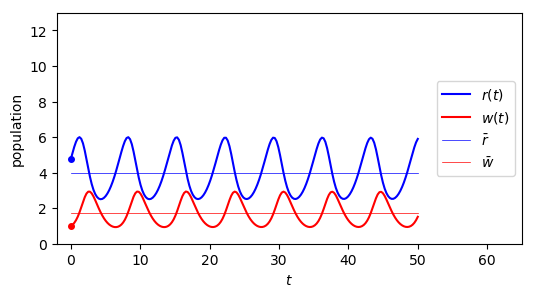

In [9]:
ϵmax = 1.6
Neps = 20
ϵvec = linspace(0.0,ϵmax,Neps)

f=figure(figsize=(6,3))
@manipulate for ϵ in ϵvec withfig(f,clear=true) do
    #= start of code to step through for different ϵ =#
    u0 = [β/κ + ϵ ; λ/γ - ϵ]
    ti = 0.0
    tf = 50.0
    Nt = 200
    tspan = (ti,tf)
    t = collect(linspace(ti,tf,Nt))
    prob = ODEProblem(lotkavolterra,u0,tspan)
    sol = solve(prob,saveat=t);
    r = sol[1,:];
    w = sol[2,:];
    plot(t,r,color="blue")
    plot(t,w,color="red")
    plot(t,r̄*ones(t),color="blue",lw=.5)
    plot(t,w̄*ones(t),color="red",lw=.5)
    plot(0.0,u0[1],"o",color="blue",ms=4)
    plot(0.0,u0[2],"o",color="red",ms=4)
    xlabel(L"t");ylabel("population")
    xlim(-2,65)
    ylim(0,13)
    legend([L"r(t)",L"w(t)",L"\bar r",L"\bar w"],loc="right");
    #= end of code to step through for different ϵ =#
    end
end

# Next time
## Systems of coupled ODEs
- Coupled oscillators
- Reduction of second order systems to first order
- Driving and damping
- Mechanical resonance